# Emissions of pesticide active substances in the European Union

Description
Dataset containing estimated emissions of 152 active substances at NUTS2 spatial level. It contains estimates for active substances belonging to one of the main groups: Fungicides and Bactericides, Herbicides, Insecticides and Acaricides, Plant growth regulators, Molluscicides, Other plant protection products.
The estimation has been carried out independently for each active substance on the basis of data provided by 8 EU Member States on sales of active ingredients. The spatial resolution and extent of the analysis corresponded at the regional level NUTS3 for Europe. The estimates have been developed for application in assessing the risk of toxicity in European waters caused by the application of pesticides in the agricultural sector and to answer a wide-range of policy questions, including policies related to best riparian basin and agricultural management practices.
The dataset include the prediction of active ingredient use (kilograms) per region, the common name, the CAS (Chemical Abstracts Service Council number identifier), the CIPAC (Collaborative International Pesticides Analytical Council number identifier), the ID_EUPDB (identifier in the European Union Database of pesticides) and the Chemical Class for each active substance.


### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Load Dataset

In [2]:
df = pd.read_csv('C:\\Users\\sarat\\Downloads\\pesticideActiveSubtances.zip')
df

,COUNTRY,NUTS3,Categories_of_products,Chemical_Class_Substance,ID_EUPDB,CAS,CIPAC,Substances_common_names,Arab_KG,Fruit_KG,Oliv_KG,Vines_KG,Grass_KG,Rice_KG,KG_TOT
0,AT,AT111,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,760.385094,0.000000,0.0,223.225551,0.0,0.0,983.610645
1,AT,AT112,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,2702.234726,0.000000,0.0,409.202076,0.0,0.0,3111.436803
2,AT,AT113,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,1521.092730,0.000000,0.0,261.520491,0.0,0.0,1782.613222
3,AT,AT121,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,2262.038900,0.000000,0.0,0.000000,0.0,0.0,2262.038900
4,AT,AT122,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,702.788789,0.000000,0.0,151.433720,0.0,0.0,854.222510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205284,UK,UKN01,Physiological plant growth regulators,OTHER PHYSIOLOGICAL PLANT GROWTH REGULATORS,856,86-87-3,313.0,1-NAPHTHYLACETIC ACID (1-NAA),0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
205285,UK,UKN02,Physiological plant growth regulators,OTHER PHYSIOLOGICAL PLANT GROWTH REGULATORS,856,86-87-3,313.0,1-NAPHTHYLACETIC ACID (1-NAA),0.001873,0.000000,0.0,0.000000,0.0,0.0,0.001873
205286,UK,UKN03,Physiological plant growth regulators,OTHER PHYSIOLOGICAL PLANT GROWTH REGULATORS,856,86-87-3,313.0,1-NAPHTHYLACETIC ACID (1-NAA),0.004087,0.397035,0.0,0.000000,0.0,0.0,0.401122
205287,UK,UKN04,Physiological plant growth regulators,OTHER PHYSIOLOGICAL PLANT GROWTH REGULATORS,856,86-87-3,313.0,1-NAPHTHYLACETIC ACID (1-NAA),0.003429,0.000000,0.0,0.000000,0.0,0.0,0.003429


### Identifying  the Datastructure

In [3]:
df.head()

,COUNTRY,NUTS3,Categories_of_products,Chemical_Class_Substance,ID_EUPDB,CAS,CIPAC,Substances_common_names,Arab_KG,Fruit_KG,Oliv_KG,Vines_KG,Grass_KG,Rice_KG,KG_TOT
0,AT,AT111,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,760.385094,0.0,0.0,223.225551,0.0,0.0,983.610645
1,AT,AT112,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,2702.234726,0.0,0.0,409.202076,0.0,0.0,3111.436803
2,AT,AT113,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,1521.092730,0.0,0.0,261.520491,0.0,0.0,1782.613222
3,AT,AT121,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,2262.038900,0.0,0.0,0.000000,0.0,0.0,2262.038900
4,AT,AT122,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,702.788789,0.0,0.0,151.433720,0.0,0.0,854.222510


In [4]:
df.tail()

,COUNTRY,NUTS3,Categories_of_products,Chemical_Class_Substance,ID_EUPDB,CAS,CIPAC,Substances_common_names,Arab_KG,Fruit_KG,Oliv_KG,Vines_KG,Grass_KG,Rice_KG,KG_TOT
205284,UK,UKN01,Physiological plant growth regulators,OTHER PHYSIOLOGICAL PLANT GROWTH REGULATORS,856,86-87-3,313.0,1-NAPHTHYLACETIC ACID (1-NAA),0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
205285,UK,UKN02,Physiological plant growth regulators,OTHER PHYSIOLOGICAL PLANT GROWTH REGULATORS,856,86-87-3,313.0,1-NAPHTHYLACETIC ACID (1-NAA),0.001873,0.000000,0.0,0.0,0.0,0.0,0.001873
205286,UK,UKN03,Physiological plant growth regulators,OTHER PHYSIOLOGICAL PLANT GROWTH REGULATORS,856,86-87-3,313.0,1-NAPHTHYLACETIC ACID (1-NAA),0.004087,0.397035,0.0,0.0,0.0,0.0,0.401122
205287,UK,UKN04,Physiological plant growth regulators,OTHER PHYSIOLOGICAL PLANT GROWTH REGULATORS,856,86-87-3,313.0,1-NAPHTHYLACETIC ACID (1-NAA),0.003429,0.000000,0.0,0.0,0.0,0.0,0.003429
205288,UK,UKN05,Physiological plant growth regulators,OTHER PHYSIOLOGICAL PLANT GROWTH REGULATORS,856,86-87-3,313.0,1-NAPHTHYLACETIC ACID (1-NAA),0.000909,0.469333,0.0,0.0,0.0,0.0,0.470242


In [5]:
df.shape 

(205289, 15)

In [6]:
df.columns

Index(['COUNTRY', 'NUTS3', 'Categories_of_products',
       'Chemical_Class_Substance', 'ID_EUPDB', 'CAS', 'CIPAC',
       'Substances_common_names', 'Arab_KG', 'Fruit_KG', 'Oliv_KG', 'Vines_KG',
       'Grass_KG', 'Rice_KG', 'KG_TOT'],
      dtype='object')

In [7]:
df.dtypes 

COUNTRY                      object
NUTS3                        object
Categories_of_products       object
Chemical_Class_Substance     object
ID_EUPDB                      int64
CAS                          object
CIPAC                       float64
Substances_common_names      object
Arab_KG                     float64
Fruit_KG                    float64
Oliv_KG                     float64
Vines_KG                    float64
Grass_KG                    float64
Rice_KG                     float64
KG_TOT                      float64
dtype: object

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205289 entries, 0 to 205288
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   COUNTRY                   205289 non-null  object 
 1   NUTS3                     205289 non-null  object 
 2   Categories_of_products    205289 non-null  object 
 3   Chemical_Class_Substance  205289 non-null  object 
 4   ID_EUPDB                  205289 non-null  int64  
 5   CAS                       205289 non-null  object 
 6   CIPAC                     205289 non-null  float64
 7   Substances_common_names   205289 non-null  object 
 8   Arab_KG                   205289 non-null  float64
 9   Fruit_KG                  205289 non-null  float64
 10  Oliv_KG                   205289 non-null  float64
 11  Vines_KG                  205289 non-null  float64
 12  Grass_KG                  205289 non-null  float64
 13  Rice_KG                   205289 non-null  f

In [9]:
df.describe(include='all')

,COUNTRY,NUTS3,Categories_of_products,Chemical_Class_Substance,ID_EUPDB,CAS,CIPAC,Substances_common_names,Arab_KG,Fruit_KG,Oliv_KG,Vines_KG,Grass_KG,Rice_KG,KG_TOT
count,205289,205289,205289,205289,205289.000000,205289,205289.000000,205289,205289.000000,2.052890e+05,205289.000000,205289.000000,2.052890e+05,205289.000000,2.052890e+05
unique,35,1366,22,69,NaN,150,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,DE,AT111,Other herbicides,ANILIDE FUNGICIDES,NaN,68157-60-8,NaN,FORCHLORFENURON,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,60702,151,52991,12240,NaN,2726,NaN,2726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1483.866973,NaN,479.825586,NaN,982.795849,7.132842e+01,18.136260,69.225352,2.495027e+02,0.041030,1.391030e+03
std,NaN,NaN,NaN,NaN,334.887105,NaN,230.018901,NaN,4853.747037,2.847478e+03,509.907901,1495.147680,1.027883e+04,4.531265,1.233575e+04
min,NaN,NaN,NaN,NaN,856.000000,NaN,2.000000,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,NaN,NaN,NaN,NaN,1197.000000,NaN,332.000000,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,NaN,NaN,NaN,NaN,1467.000000,NaN,494.000000,NaN,34.690363,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,4.759776e+01
75%,NaN,NaN,NaN,NaN,1776.000000,NaN,641.202000,NaN,369.422052,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,4.476794e+02


### Identifying Null Values 

In [10]:
df.isnull().sum()

COUNTRY                     0
NUTS3                       0
Categories_of_products      0
Chemical_Class_Substance    0
ID_EUPDB                    0
CAS                         0
CIPAC                       0
Substances_common_names     0
Arab_KG                     0
Fruit_KG                    0
Oliv_KG                     0
Vines_KG                    0
Grass_KG                    0
Rice_KG                     0
KG_TOT                      0
dtype: int64

No Null Values detected

### Handling Duplicate values 

In [11]:
df.duplicated().sum() 

816

In [12]:
data=df.drop_duplicates()

In [13]:
data

,COUNTRY,NUTS3,Categories_of_products,Chemical_Class_Substance,ID_EUPDB,CAS,CIPAC,Substances_common_names,Arab_KG,Fruit_KG,Oliv_KG,Vines_KG,Grass_KG,Rice_KG,KG_TOT
0,AT,AT111,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,760.385094,0.000000,0.0,223.225551,0.0,0.0,983.610645
1,AT,AT112,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,2702.234726,0.000000,0.0,409.202076,0.0,0.0,3111.436803
2,AT,AT113,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,1521.092730,0.000000,0.0,261.520491,0.0,0.0,1782.613222
3,AT,AT121,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,2262.038900,0.000000,0.0,0.000000,0.0,0.0,2262.038900
4,AT,AT122,Other fungicides and bactericides,ANILIDE FUNGICIDES,1040,188425-85-6,673.0,BOSCALID,702.788789,0.000000,0.0,151.433720,0.0,0.0,854.222510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205284,UK,UKN01,Physiological plant growth regulators,OTHER PHYSIOLOGICAL PLANT GROWTH REGULATORS,856,86-87-3,313.0,1-NAPHTHYLACETIC ACID (1-NAA),0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
205285,UK,UKN02,Physiological plant growth regulators,OTHER PHYSIOLOGICAL PLANT GROWTH REGULATORS,856,86-87-3,313.0,1-NAPHTHYLACETIC ACID (1-NAA),0.001873,0.000000,0.0,0.000000,0.0,0.0,0.001873
205286,UK,UKN03,Physiological plant growth regulators,OTHER PHYSIOLOGICAL PLANT GROWTH REGULATORS,856,86-87-3,313.0,1-NAPHTHYLACETIC ACID (1-NAA),0.004087,0.397035,0.0,0.000000,0.0,0.0,0.401122
205287,UK,UKN04,Physiological plant growth regulators,OTHER PHYSIOLOGICAL PLANT GROWTH REGULATORS,856,86-87-3,313.0,1-NAPHTHYLACETIC ACID (1-NAA),0.003429,0.000000,0.0,0.000000,0.0,0.0,0.003429


### Encoding 

In [14]:
object_columns=data.select_dtypes(include='object').columns
object_columns

Index(['COUNTRY', 'NUTS3', 'Categories_of_products',
       'Chemical_Class_Substance', 'CAS', 'Substances_common_names'],
      dtype='object')

In [15]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [16]:
encoder=LabelEncoder()

In [17]:
data=data.copy()
data['COUNTRY']=encoder.fit_transform(data['COUNTRY'])
data['NUTS3']=encoder.fit_transform(data['NUTS3'])
data['Categories_of_products']=encoder.fit_transform(data['Categories_of_products'])
data['Chemical_Class_Substance']=encoder.fit_transform(data['Chemical_Class_Substance'])
data['CAS']=encoder.fit_transform(data['CAS'])
data['Substances_common_names']=encoder.fit_transform(data['Substances_common_names'])

In [18]:
data

,COUNTRY,NUTS3,Categories_of_products,Chemical_Class_Substance,ID_EUPDB,CAS,CIPAC,Substances_common_names,Arab_KG,Fruit_KG,Oliv_KG,Vines_KG,Grass_KG,Rice_KG,KG_TOT
0,6,6,14,3,1040,65,673.0,16,760.385094,0.000000,0.0,223.225551,0.0,0.0,983.610645
1,6,7,14,3,1040,65,673.0,16,2702.234726,0.000000,0.0,409.202076,0.0,0.0,3111.436803
2,6,8,14,3,1040,65,673.0,16,1521.092730,0.000000,0.0,261.520491,0.0,0.0,1782.613222
3,6,9,14,3,1040,65,673.0,16,2262.038900,0.000000,0.0,0.000000,0.0,0.0,2262.038900
4,6,10,14,3,1040,65,673.0,16,702.788789,0.000000,0.0,151.433720,0.0,0.0,854.222510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205284,34,1361,17,35,856,135,313.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
205285,34,1362,17,35,856,135,313.0,0,0.001873,0.000000,0.0,0.000000,0.0,0.0,0.001873
205286,34,1363,17,35,856,135,313.0,0,0.004087,0.397035,0.0,0.000000,0.0,0.0,0.401122
205287,34,1364,17,35,856,135,313.0,0,0.003429,0.000000,0.0,0.000000,0.0,0.0,0.003429


### Outlier Detection 

In [19]:
num_data=data.select_dtypes(include=["number"])
num_data

,COUNTRY,NUTS3,Categories_of_products,Chemical_Class_Substance,ID_EUPDB,CAS,CIPAC,Substances_common_names,Arab_KG,Fruit_KG,Oliv_KG,Vines_KG,Grass_KG,Rice_KG,KG_TOT
0,6,6,14,3,1040,65,673.0,16,760.385094,0.000000,0.0,223.225551,0.0,0.0,983.610645
1,6,7,14,3,1040,65,673.0,16,2702.234726,0.000000,0.0,409.202076,0.0,0.0,3111.436803
2,6,8,14,3,1040,65,673.0,16,1521.092730,0.000000,0.0,261.520491,0.0,0.0,1782.613222
3,6,9,14,3,1040,65,673.0,16,2262.038900,0.000000,0.0,0.000000,0.0,0.0,2262.038900
4,6,10,14,3,1040,65,673.0,16,702.788789,0.000000,0.0,151.433720,0.0,0.0,854.222510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205284,34,1361,17,35,856,135,313.0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
205285,34,1362,17,35,856,135,313.0,0,0.001873,0.000000,0.0,0.000000,0.0,0.0,0.001873
205286,34,1363,17,35,856,135,313.0,0,0.004087,0.397035,0.0,0.000000,0.0,0.0,0.401122
205287,34,1364,17,35,856,135,313.0,0,0.003429,0.000000,0.0,0.000000,0.0,0.0,0.003429


In [20]:
s=data.select_dtypes(include="number").corr()

<Axes: >

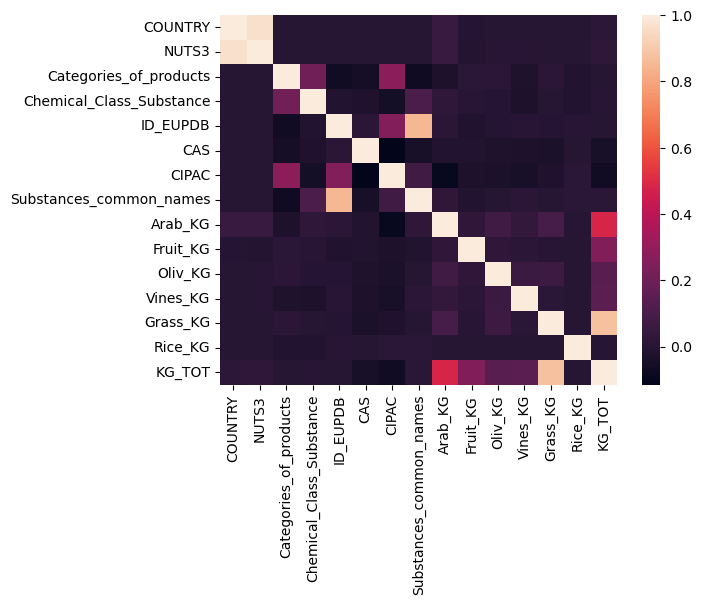

In [21]:
sns.heatmap(s)

In [22]:
def plot_hist(column):
  plt.figure(figsize=(8,4))
  sns.histplot(data=data,x=column,kde=True)
  plt.show()

C:\Users\sarat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


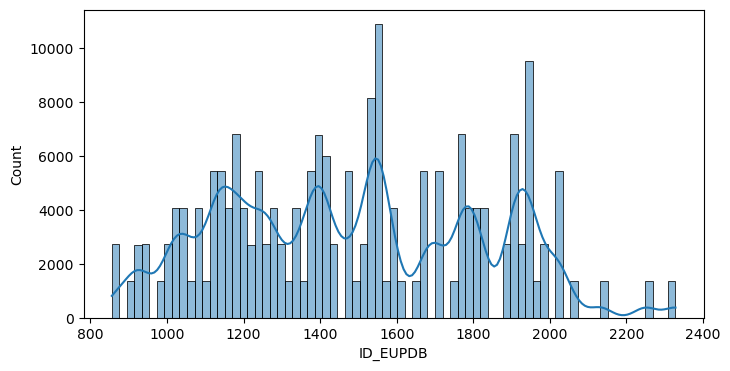

C:\Users\sarat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


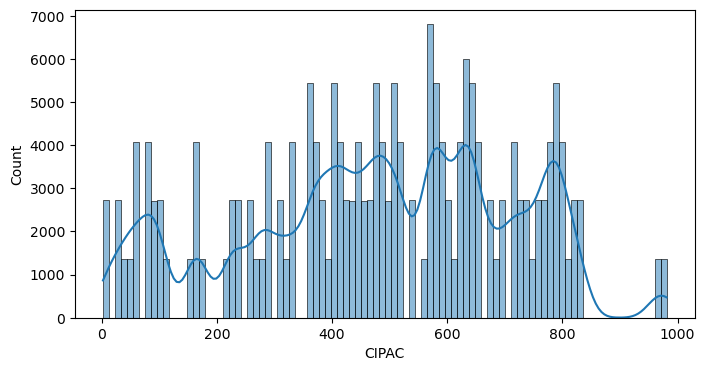

C:\Users\sarat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


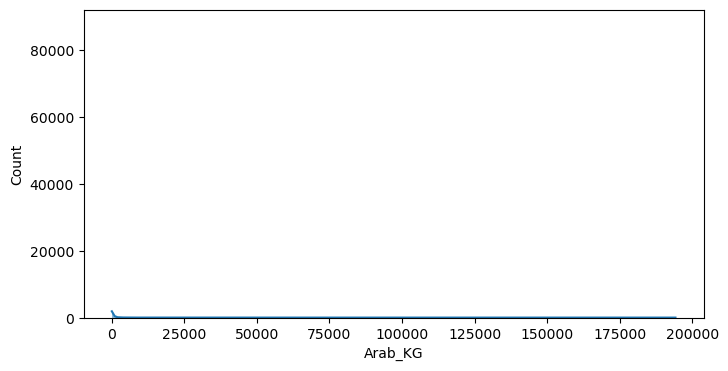

C:\Users\sarat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


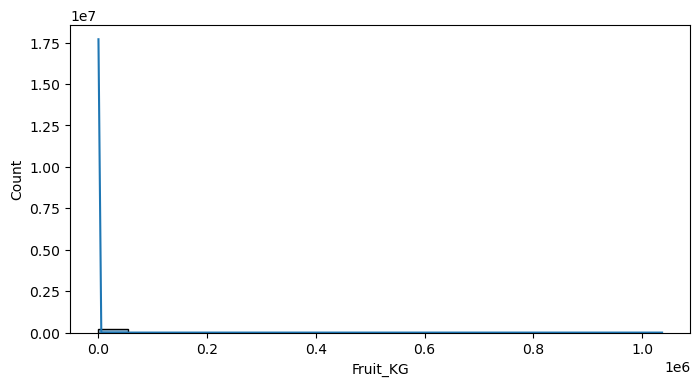

C:\Users\sarat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


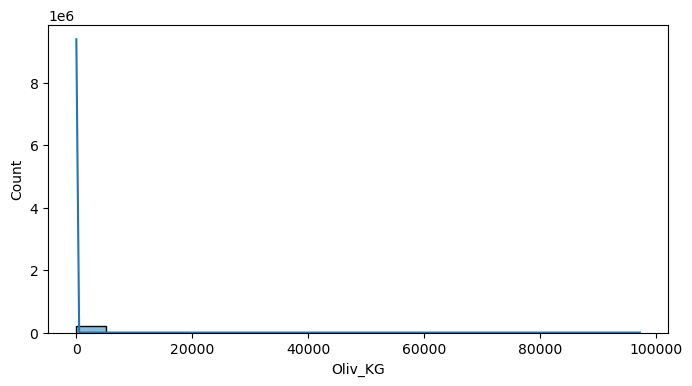

C:\Users\sarat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


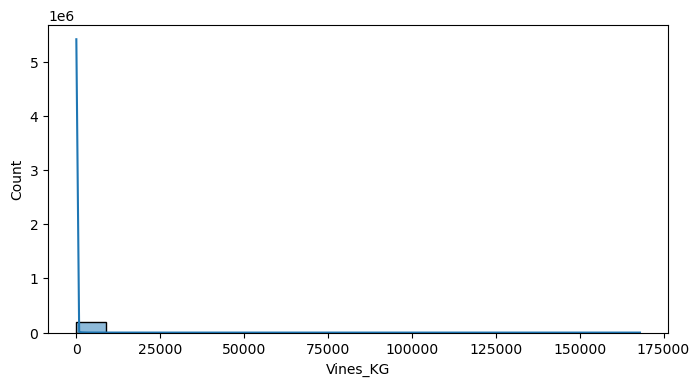

C:\Users\sarat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


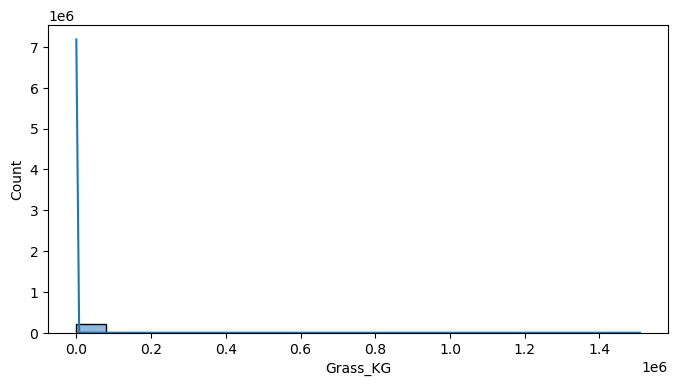

C:\Users\sarat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


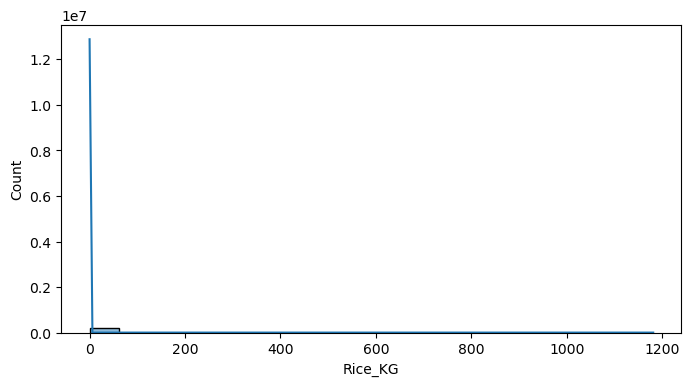

In [23]:
plot_hist('ID_EUPDB')
plot_hist('CIPAC')
plot_hist('Arab_KG')
plot_hist('Fruit_KG')
plot_hist('Oliv_KG')
plot_hist('Vines_KG')
plot_hist('Grass_KG')
plot_hist('Rice_KG')

In [24]:
num_col=data[['Fruit_KG', 'Oliv_KG', 'Vines_KG',
       'Grass_KG', 'Rice_KG']]

C:\Users\sarat\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\sarat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


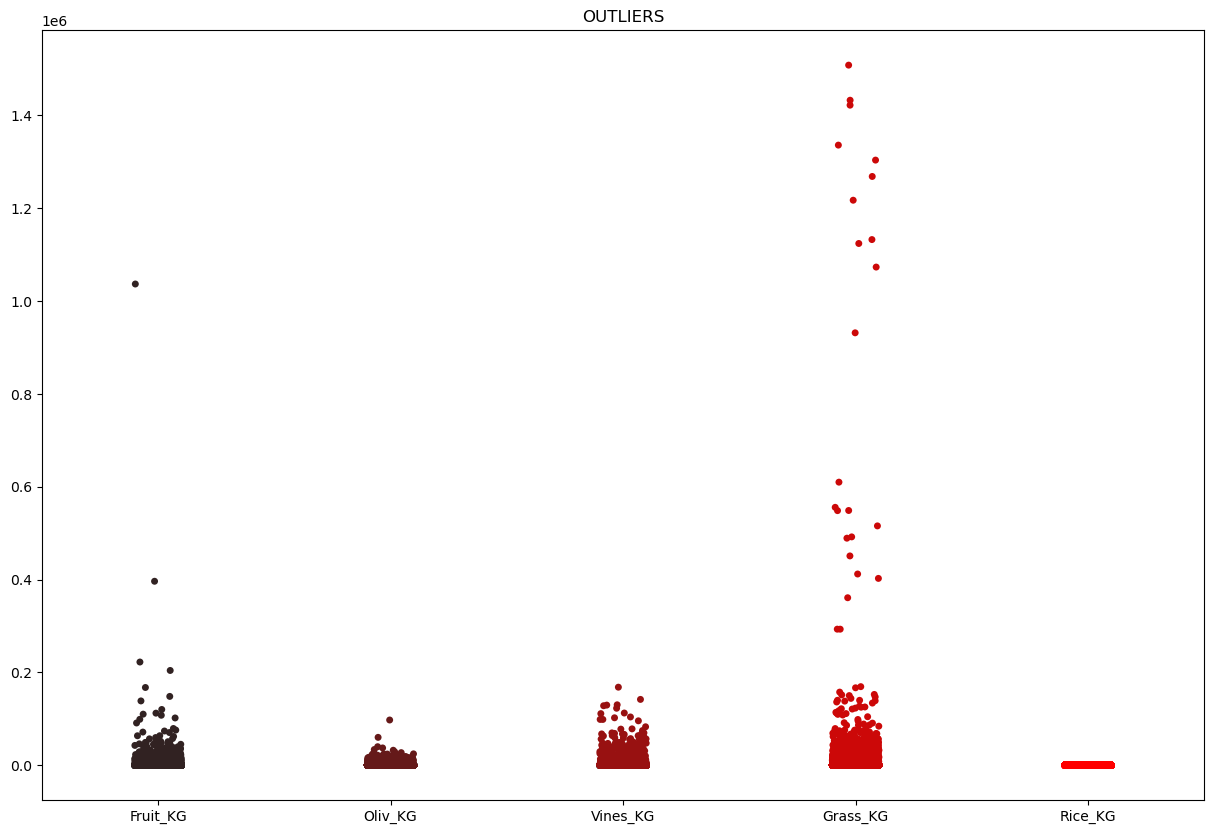

In [25]:
plt.figure(figsize=(15,10))

sns.stripplot(num_col,color='red',size=5)
plt.title('OUTLIERS')
plt.show()

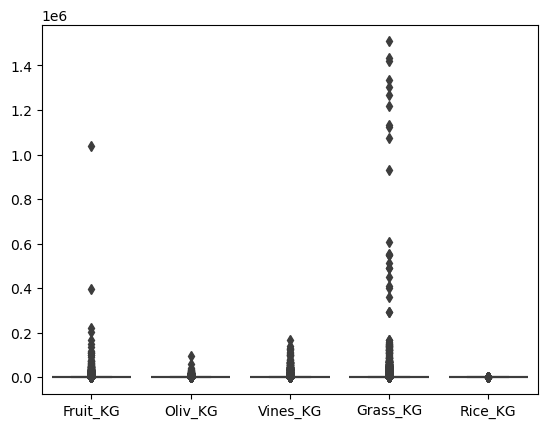

In [26]:
sns.boxplot(num_col)
plt.show()

In [27]:
Q1 = num_col.quantile(0.25)
Q3 = num_col.quantile(0.75)



IQR = Q3 - Q1

print(Q1,Q3,IQR)

Fruit_KG    0.0
Oliv_KG     0.0
Vines_KG    0.0
Grass_KG    0.0
Rice_KG     0.0
Name: 0.25, dtype: float64 Fruit_KG    0.0
Oliv_KG     0.0
Vines_KG    0.0
Grass_KG    0.0
Rice_KG     0.0
Name: 0.75, dtype: float64 Fruit_KG    0.0
Oliv_KG     0.0
Vines_KG    0.0
Grass_KG    0.0
Rice_KG     0.0
dtype: float64


In [28]:
skewness = num_col.skew()
print("Skewness:\n", skewness)

Skewness:
 Fruit_KG    257.309782
Oliv_KG      67.058898
Vines_KG     51.776076
Grass_KG    108.003483
Rice_KG     176.991146
dtype: float64


In [29]:
#Checking kurtosis
kurtosis=num_col.kurtosis()
print("kurtosis:\n", kurtosis)

kurtosis:
 Fruit_KG    87581.089738
Oliv_KG      8455.346808
Vines_KG     3607.634260
Grass_KG    13200.977978
Rice_KG     37947.887146
dtype: float64


<Figure size 1500x1000 with 0 Axes>

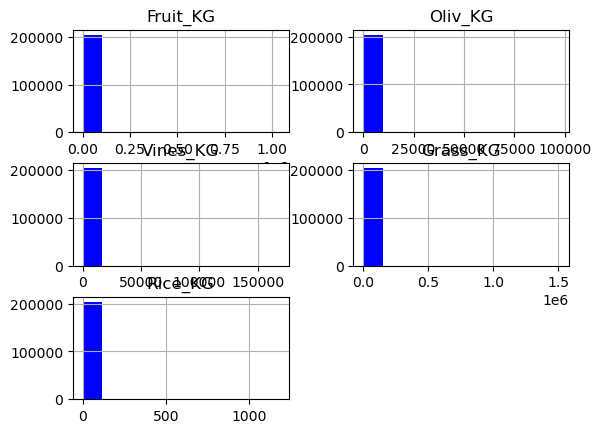

In [30]:
plt.figure(figsize=(15,10))
num_col.hist(color='blue')

plt.show()

### Feature Selection 

In [31]:
from sklearn.preprocessing import StandardScaler

In [36]:
numerical_columns=data.select_dtypes(include="number").columns

In [37]:
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [38]:
data

,COUNTRY,NUTS3,Categories_of_products,Chemical_Class_Substance,ID_EUPDB,CAS,CIPAC,Substances_common_names,Arab_KG,Fruit_KG,Oliv_KG,Vines_KG,Grass_KG,Rice_KG,KG_TOT
0,-1.427192,-1.731437,0.43466,-1.397183,-1.323750,-0.222483,0.841548,-1.352848,-0.046542,-0.025100,-0.035639,0.102611,-0.024322,-0.009073,-0.033412
1,-1.427192,-1.728889,0.43466,-1.397183,-1.323750,-0.222483,0.841548,-1.352848,0.352768,-0.025100,-0.035639,0.226751,-0.024322,-0.009073,0.138742
2,-1.427192,-1.726342,0.43466,-1.397183,-1.323750,-0.222483,0.841548,-1.352848,0.109886,-0.025100,-0.035639,0.128173,-0.024322,-0.009073,0.031232
3,-1.427192,-1.723794,0.43466,-1.397183,-1.323750,-0.222483,0.841548,-1.352848,0.262249,-0.025100,-0.035639,-0.046393,-0.024322,-0.009073,0.070021
4,-1.427192,-1.721247,0.43466,-1.397183,-1.323750,-0.222483,0.841548,-1.352848,-0.058385,-0.025100,-0.035639,0.054690,-0.024322,-0.009073,-0.043880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205284,1.701411,1.720480,1.04412,0.118761,-1.872146,1.393590,-0.721815,-1.722835,-0.202903,-0.025100,-0.035639,-0.046393,-0.024322,-0.009073,-0.112992
205285,1.701411,1.723028,1.04412,0.118761,-1.872146,1.393590,-0.721815,-1.722835,-0.202902,-0.025100,-0.035639,-0.046393,-0.024322,-0.009073,-0.112992
205286,1.701411,1.725575,1.04412,0.118761,-1.872146,1.393590,-0.721815,-1.722835,-0.202902,-0.024961,-0.035639,-0.046393,-0.024322,-0.009073,-0.112960
205287,1.701411,1.728123,1.04412,0.118761,-1.872146,1.393590,-0.721815,-1.722835,-0.202902,-0.025100,-0.035639,-0.046393,-0.024322,-0.009073,-0.112992
